In [126]:
import mitsuba as mi

In [127]:
mi.variants()

['scalar_rgb',
 'scalar_spectral',
 'scalar_spectral_polarized',
 'llvm_ad_rgb',
 'llvm_ad_mono',
 'llvm_ad_mono_polarized',
 'llvm_ad_spectral',
 'llvm_ad_spectral_polarized',
 'cuda_ad_rgb',
 'cuda_ad_mono',
 'cuda_ad_mono_polarized',
 'cuda_ad_spectral',
 'cuda_ad_spectral_polarized']

In [128]:
import sys
import platform
print(sys.version)

3.10.17 | packaged by conda-forge | (main, Apr 10 2025, 22:19:12) [GCC 13.3.0]


In [129]:
import matplotlib.pyplot as plt

import drjit as dr
import mitsuba as mi

#mi.set_variant('cuda_ad_rgb', 'llvm_ad_rgb')
mi.set_variant('llvm_ad_rgb')

In [130]:
from mitsuba import ScalarTransform4f as T

sensor_count = 3
sensors = []
Resolution = 128

# for i in range(sensor_count):
angle = 180.0 / sensor_count - 90.0
sensor_rotation = T().rotate([0, 1, 0], angle)
sensor_to_world = T().look_at(target=[0, 0, 0], origin=[0, -2, 2], up=[0, 1, 0])
sensors.append(mi.load_dict({
        'type': 'perspective',
        'fov': 45,
        'to_world': sensor_rotation @ sensor_to_world,
        'film': {
            'type': 'hdrfilm',
            'width': Resolution*4, 'height': Resolution*4,
            'filter': {'type': 'gaussian'}
        }
    }))

In [131]:
scene_dict = {
    'type': 'scene',
    'integrator': {'type': 'prbvolpath'},
    'object': {
        'type': 'cube',
        'bsdf': {'type': 'null'},
        'interior': {
            'type': 'heterogeneous',
            'sigma_t': {
                'type': 'gridvolume',
                'filename': '../frame_000099.vol',
                'to_world': T().rotate([1, 0, 0], 0).scale(2).translate(-0.5)
            },
            'scale': 40
        }
    },
    'emitter': {'type': 'constant'}
}

scene_ref = mi.load_dict(scene_dict)

# Number of samples per pixel for reference images
ref_spp = 512

In [132]:
#ref_images = [mi.render(scene_ref, sensor=sensors[i], spp=ref_spp) for i in range(sensor_count)]
ref_images = mi.render(scene_ref, sensor=sensors[0], spp=ref_spp)

(-0.5, 511.5, 511.5, -0.5)

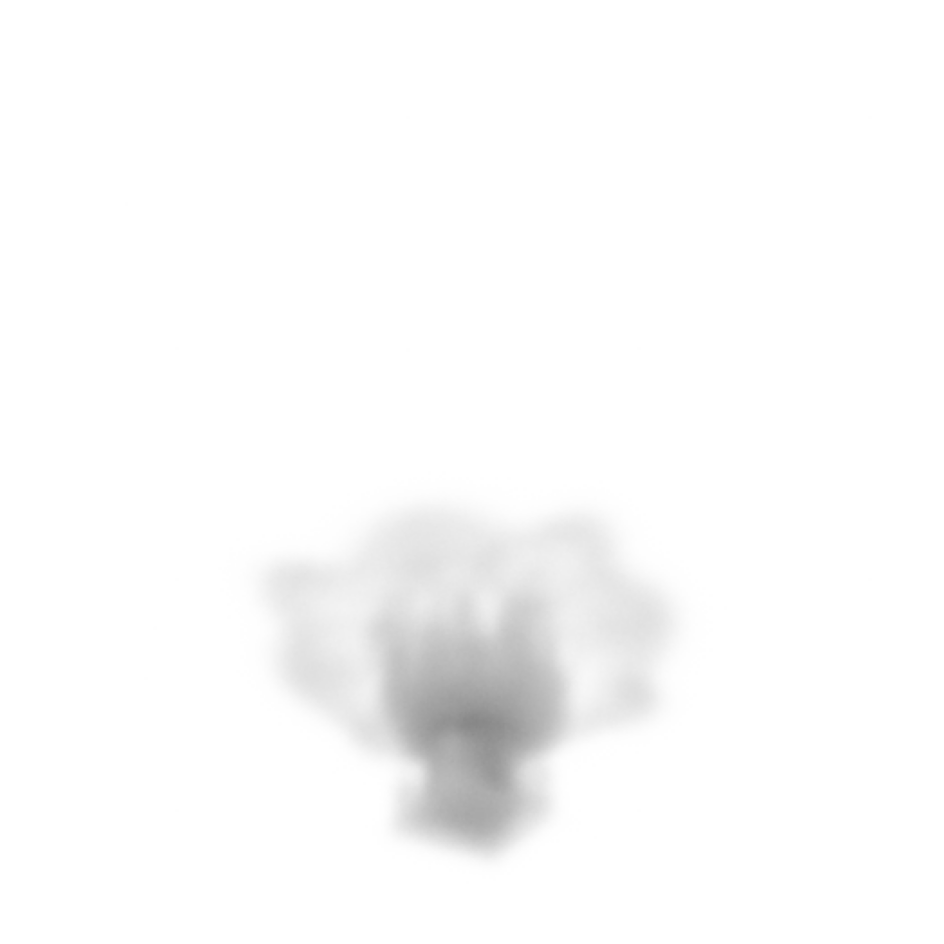

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(42, 12))
# for i in range(sensor_count):
#     axs[i].imshow(mi.util.convert_to_bitmap(ref_images[i]))
#     axs[i].axis('off')

axs.imshow(mi.util.convert_to_bitmap(ref_images))
axs.axis('off')
